In [2]:
import numpy as np
import matplotlib.pyplot as plt
from functions import get_phasor, get_fft_data, plot_average_fft, animate_phasor, exponential_fourier_series

In [3]:
duration=1
sampling_rate=1024

# DC - No Frequency
dc_phasor = get_phasor(amplitude=7, frequency=0, duration=duration, fs=sampling_rate, phase_angle_degrees=0)

# 2nd phasor:
phasor_1 = get_phasor(amplitude=10, frequency=20, duration=duration, fs=sampling_rate, phase_angle_degrees=120)

# 3rd phasor
phasor_2 = get_phasor(amplitude=4, frequency=60, duration=duration, fs=sampling_rate, phase_angle_degrees=-90)


#Combine the components
combined_phasor = dc_phasor + phasor_1 + phasor_2

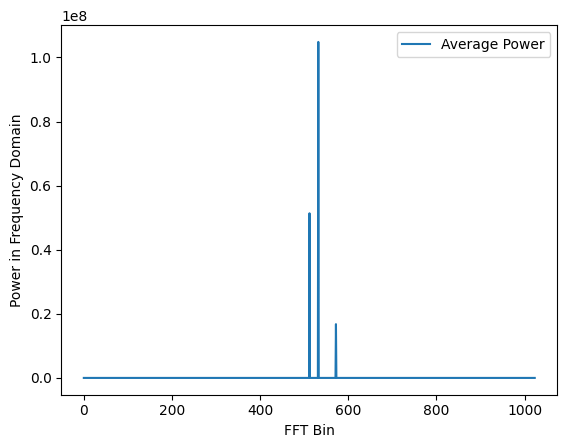

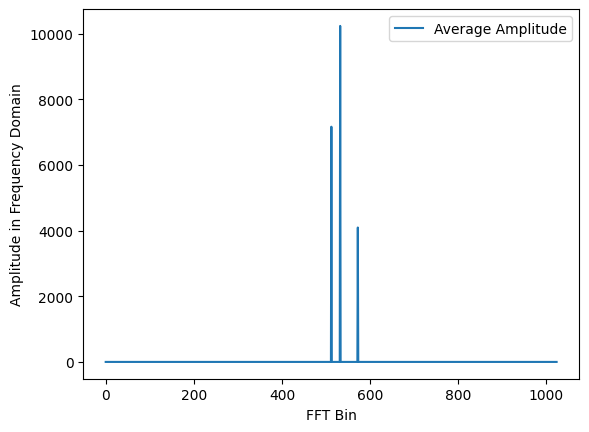

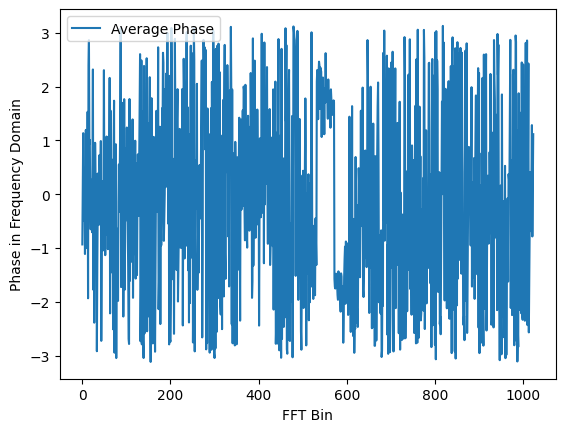

In [4]:
combined_phasor_fft = get_fft_data(combined_phasor, sampling_rate)

# Power
combined_phasor_fft_power = np.abs(combined_phasor_fft)**2
plot_average_fft(np.fft.fftshift(combined_phasor_fft_power), 'Power')

# Amplitude
combined_phasor_fft_amp = np.abs(combined_phasor_fft)
plot_average_fft(np.fft.fftshift(combined_phasor_fft_amp), 'Amplitude')

# Phase
combined_phasor_fft_phase = np.angle(combined_phasor_fft)
plot_average_fft(np.fft.fftshift(combined_phasor_fft_phase), 'Phase')

Sum of Cosines for figure 2.1.3

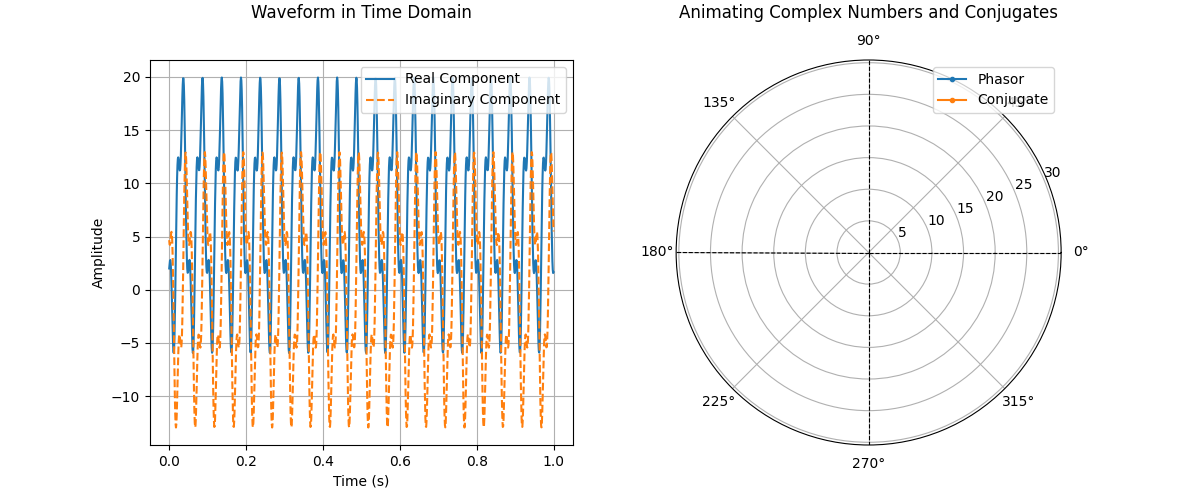

In [5]:
%matplotlib widget
animation = animate_phasor(combined_phasor, np.max(np.abs(combined_phasor)), duration)

fDelta: 4.0
power_frequency_domain.shape: (4, 256)
phase_frequency_domain.shape: (4, 256)


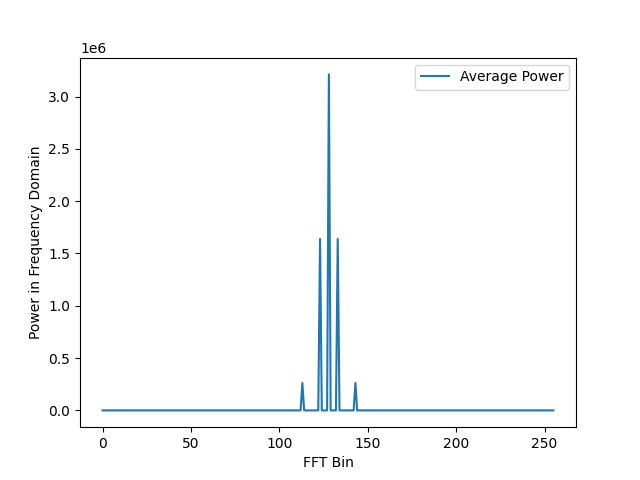

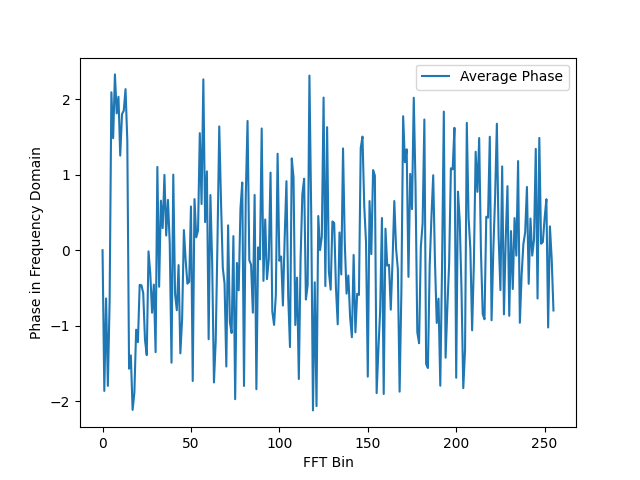

In [6]:
nfft=256
print(f'fDelta: {sampling_rate/nfft}')
# power_frequency_domain = np.abs(get_fft_data(combined_phasor, nfft))**2
power_frequency_domain = np.abs(np.fft.fftshift(get_fft_data(np.real(combined_phasor), nfft)))**2

phase_frequency_domain = np.angle(get_fft_data(combined_phasor, nfft))
print(f'power_frequency_domain.shape: {power_frequency_domain.shape}')
print(f'phase_frequency_domain.shape: {phase_frequency_domain.shape}')

plot_average_fft(power_frequency_domain, 'Power')
plot_average_fft(phase_frequency_domain, 'Phase')

In [7]:
# Define signal properties
nfft = sampling_rate * duration  # Total points in one period
T = duration  # Period of the signal

# Fourier series parameters
n_harmonics = 50  # Number of harmonics to calculate
t_reconstruct = np.linspace(0, T, 500, endpoint=False)  # High-resolution time for reconstruction

# Perform exponential Fourier series
c_n, reconstructed_signal = exponential_fourier_series(
    signal=combined_phasor,
    T=T,
    n_harmonics=n_harmonics,
    t_reconstruct=t_reconstruct
)

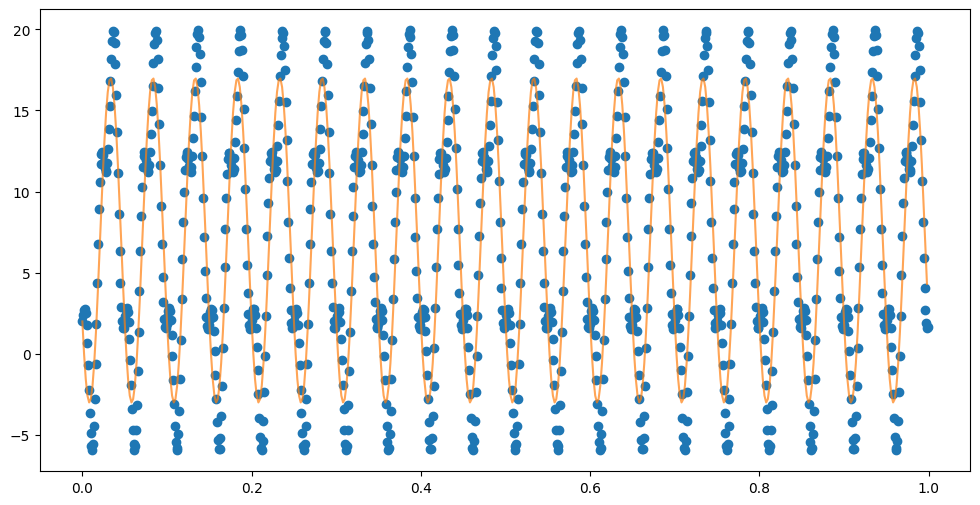

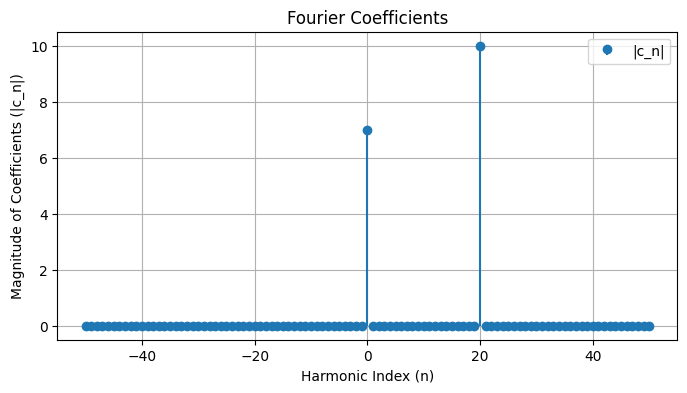

In [10]:
%matplotlib inline
plt.figure(figsize=(12, 6))

# Original signal
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

plt.plot(t, combined_phasor.real, label="Original Signal", marker="o", linestyle="")

# Reconstructed signal
plt.plot(t_reconstruct, reconstructed_signal, label="Reconstructed Signal", alpha=0.7)

# Coefficients
plt.figure(figsize=(8, 4))
plt.stem(
    range(-n_harmonics, n_harmonics + 1), 
    np.abs(c_n), 
    basefmt=" ",
    label="|c_n|"
)
plt.xlabel("Harmonic Index (n)")
plt.ylabel("Magnitude of Coefficients (|c_n|)")
plt.title("Fourier Coefficients")
plt.legend()
plt.grid()

plt.show()

In [11]:
# Parameters
amplitude = 5           # Amplitude of the sine wave
frequency = 10          # Frequency in Hz
sampling_rate = 1024    # Sampling rate in Hz
duration = 1            # Duration in seconds

# Time vector centered around 0 to properly show sinc function
# sinc function is best viewed from negative to positive time
t = np.linspace(-10, 10, int(sampling_rate * 2), endpoint=False)

# Sinc function: sin(π*t)/(π*t)
sinc = np.sinc(t)

# For comparison, also create the manual implementation
def sinc_manual(x):
    """Manual implementation of sinc function: sin(πx)/(πx)"""
    with np.errstate(divide='ignore', invalid='ignore'):
        result = np.sin(np.pi * x) / (np.pi * x)
        # Handle the limit case where x = 0 (sinc(0) = 1)
        result = np.where(x == 0, 1, result)
    return result

sinc_manual_result = sinc_manual(t)

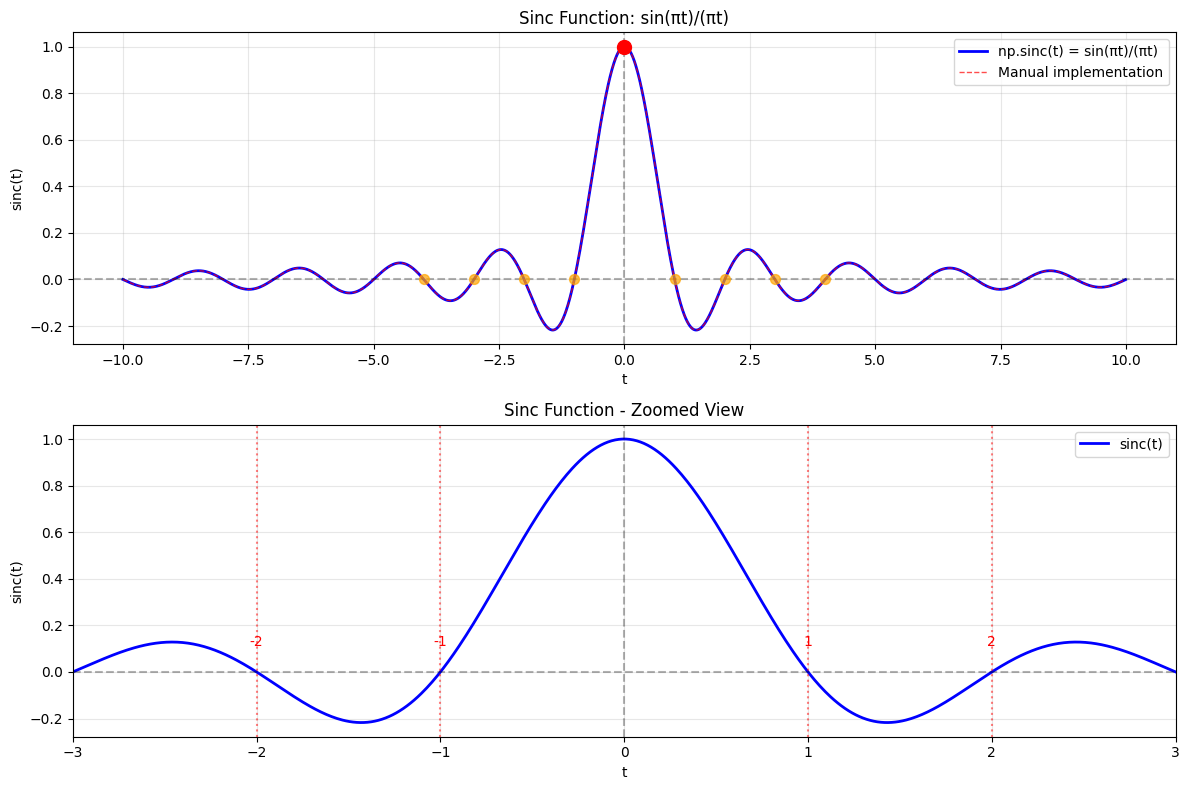

Sinc Function Properties:
sinc(0) = 1.000000
Zero crossings at: ..., -2, -1, 1, 2, ... (all non-zero integers)
sinc(t) = sin(πt)/(πt)
Maximum value = 1 at t = 0


In [12]:
plt.figure(figsize=(12, 8))

# Plot the sinc function
plt.subplot(2, 1, 1)
plt.plot(t, sinc, 'b-', linewidth=2, label='np.sinc(t) = sin(πt)/(πt)')
plt.plot(t, sinc_manual_result, 'r--', linewidth=1, alpha=0.7, label='Manual implementation')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('t')
plt.ylabel('sinc(t)')
plt.title('Sinc Function: sin(πt)/(πt)')
plt.legend()

# Mark important points
plt.scatter([0], [1], color='red', s=100, zorder=5, label='sinc(0) = 1')
zeros = np.arange(-4, 5)
zeros = zeros[zeros != 0]  # Remove the center point
plt.scatter(zeros, np.zeros_like(zeros), color='orange', s=50, zorder=5, alpha=0.7)

# Zoom in on the main lobe
plt.subplot(2, 1, 2)
plt.plot(t, sinc, 'b-', linewidth=2, label='sinc(t)')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.xlabel('t')
plt.ylabel('sinc(t)')
plt.title('Sinc Function - Zoomed View')
plt.xlim(-3, 3)
plt.legend()

# Mark zero crossings at ±1, ±2, etc.
for i in range(-2, 3):
    if i != 0:
        plt.axvline(x=i, color='red', linestyle=':', alpha=0.5)
        plt.text(i, 0.1, f'{i}', ha='center', va='bottom', fontsize=10, color='red')

plt.tight_layout()
plt.show()

print("Sinc Function Properties:")
print(f"sinc(0) = {sinc[len(sinc)//2]:.6f}")
print("Zero crossings at: ..., -2, -1, 1, 2, ... (all non-zero integers)")
print("sinc(t) = sin(πt)/(πt)")
print("Maximum value = 1 at t = 0")

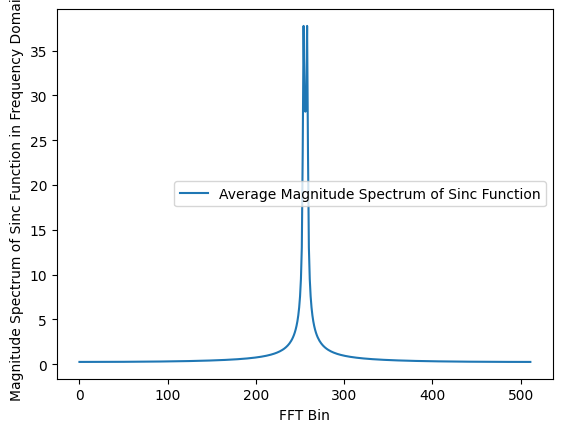

In [80]:
sinc_fft = get_fft_data(sinc, nfft=512)
sinc_fft_magnitude = np.abs(sinc_fft)
sinc_fft_magnitude_shifted = np.fft.fftshift(sinc_fft_magnitude)
plot_average_fft(sinc_fft_magnitude_shifted, 'Magnitude Spectrum of Sinc Function')

## Periodic Train of Rectangular Pulses

A periodic pulse train is a fundamental signal in digital communications and signal processing. It consists of rectangular pulses that repeat at regular intervals.

Key parameters:
- **T**: Period of repetition
- **τ (tau)**: Pulse width
- **A**: Pulse amplitude
- **Duty cycle**: τ/T (fraction of time the pulse is "on")

In [13]:
# Parameters for rectangular pulse train
T_period = 2.0          # Period of repetition (seconds)
pulse_width = 0.5       # Width of each pulse (seconds)
amplitude = 1.0         # Amplitude of pulses
total_duration = 10.0   # Total time to observe (seconds)
fs = 1000              # Sampling frequency (Hz)

# Create time vector
t_pulse = np.linspace(0, total_duration, int(fs * total_duration), endpoint=False)

def rectangular_pulse_train(t, T, tau, A=1):
    """
    Generate a periodic train of rectangular pulses
    
    Parameters:
    t: time vector
    T: period of repetition
    tau: pulse width
    A: amplitude
    """
    # Create one period of the pulse
    pulse_train = np.zeros_like(t)
    
    # For each time point, determine if it's within a pulse
    for i, time_val in enumerate(t):
        # Find position within current period
        t_mod = time_val % T
        # Check if within pulse width
        if t_mod <= tau:
            pulse_train[i] = A
    
    return pulse_train

# Generate the pulse train
pulse_train = rectangular_pulse_train(t_pulse, T_period, pulse_width, amplitude)

# Calculate duty cycle
duty_cycle = pulse_width / T_period
print(f"Pulse Train Parameters:")
print(f"Period (T): {T_period} s")
print(f"Pulse Width (τ): {pulse_width} s") 
print(f"Duty Cycle: {duty_cycle:.2%}")
print(f"Frequency: {1/T_period:.2f} Hz")

Pulse Train Parameters:
Period (T): 2.0 s
Pulse Width (τ): 0.5 s
Duty Cycle: 25.00%
Frequency: 0.50 Hz


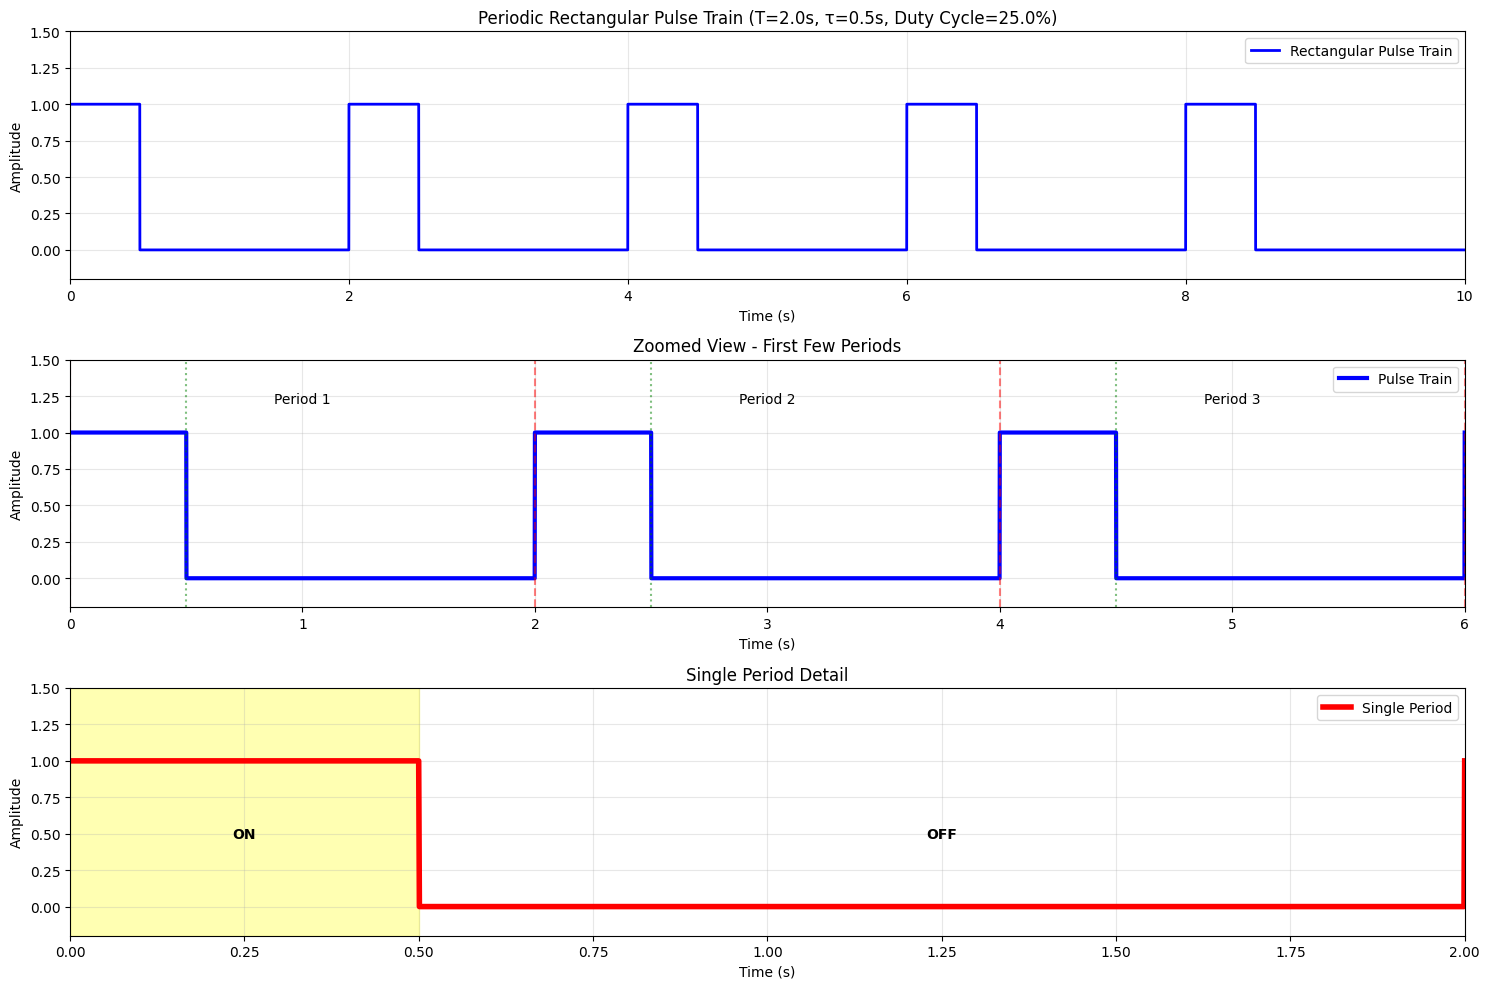


Signal Statistics:
Average value (DC component): 0.251
RMS value: 0.500
Peak-to-peak value: 1.000


In [38]:
# Plot the pulse train
plt.figure(figsize=(15, 10))

# Time domain plot - full duration
plt.subplot(3, 1, 1)
plt.plot(t_pulse, pulse_train, 'b-', linewidth=2, label=f'Rectangular Pulse Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'Periodic Rectangular Pulse Train (T={T_period}s, τ={pulse_width}s, Duty Cycle={duty_cycle:.1%})')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, total_duration)
plt.ylim(-0.2, 1.5)

# Time domain plot - zoomed to show a few periods
plt.subplot(3, 1, 2)
zoom_duration = 6  # Show first 6 seconds
zoom_mask = t_pulse <= zoom_duration
plt.plot(t_pulse[zoom_mask], pulse_train[zoom_mask], 'b-', linewidth=3, label='Pulse Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Zoomed View - First Few Periods')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, zoom_duration)
plt.ylim(-0.2, 1.5)

# Mark the periods
for i in range(int(zoom_duration/T_period) + 1):
    period_time = i * T_period
    plt.axvline(x=period_time, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=period_time + pulse_width, color='green', linestyle=':', alpha=0.5)
    if i < int(zoom_duration/T_period):
        plt.text(period_time + T_period/2, 1.2, f'Period {i+1}', ha='center', fontsize=10)

# Single period detail
plt.subplot(3, 1, 3)
single_period_mask = t_pulse <= T_period
plt.plot(t_pulse[single_period_mask], pulse_train[single_period_mask], 'r-', linewidth=4, label='Single Period')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Single Period Detail')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(0, T_period)
plt.ylim(-0.2, 1.5)

# Mark pulse width
plt.axvspan(0, pulse_width, alpha=0.3, color='yellow', label=f'Pulse Width = {pulse_width}s')
plt.text(pulse_width/2, 0.5, 'ON', ha='center', va='center', fontweight='bold')
plt.text(pulse_width + (T_period-pulse_width)/2, 0.5, 'OFF', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nSignal Statistics:")
print(f"Average value (DC component): {np.mean(pulse_train):.3f}")
print(f"RMS value: {np.sqrt(np.mean(pulse_train**2)):.3f}")
print(f"Peak-to-peak value: {np.max(pulse_train) - np.min(pulse_train):.3f}")

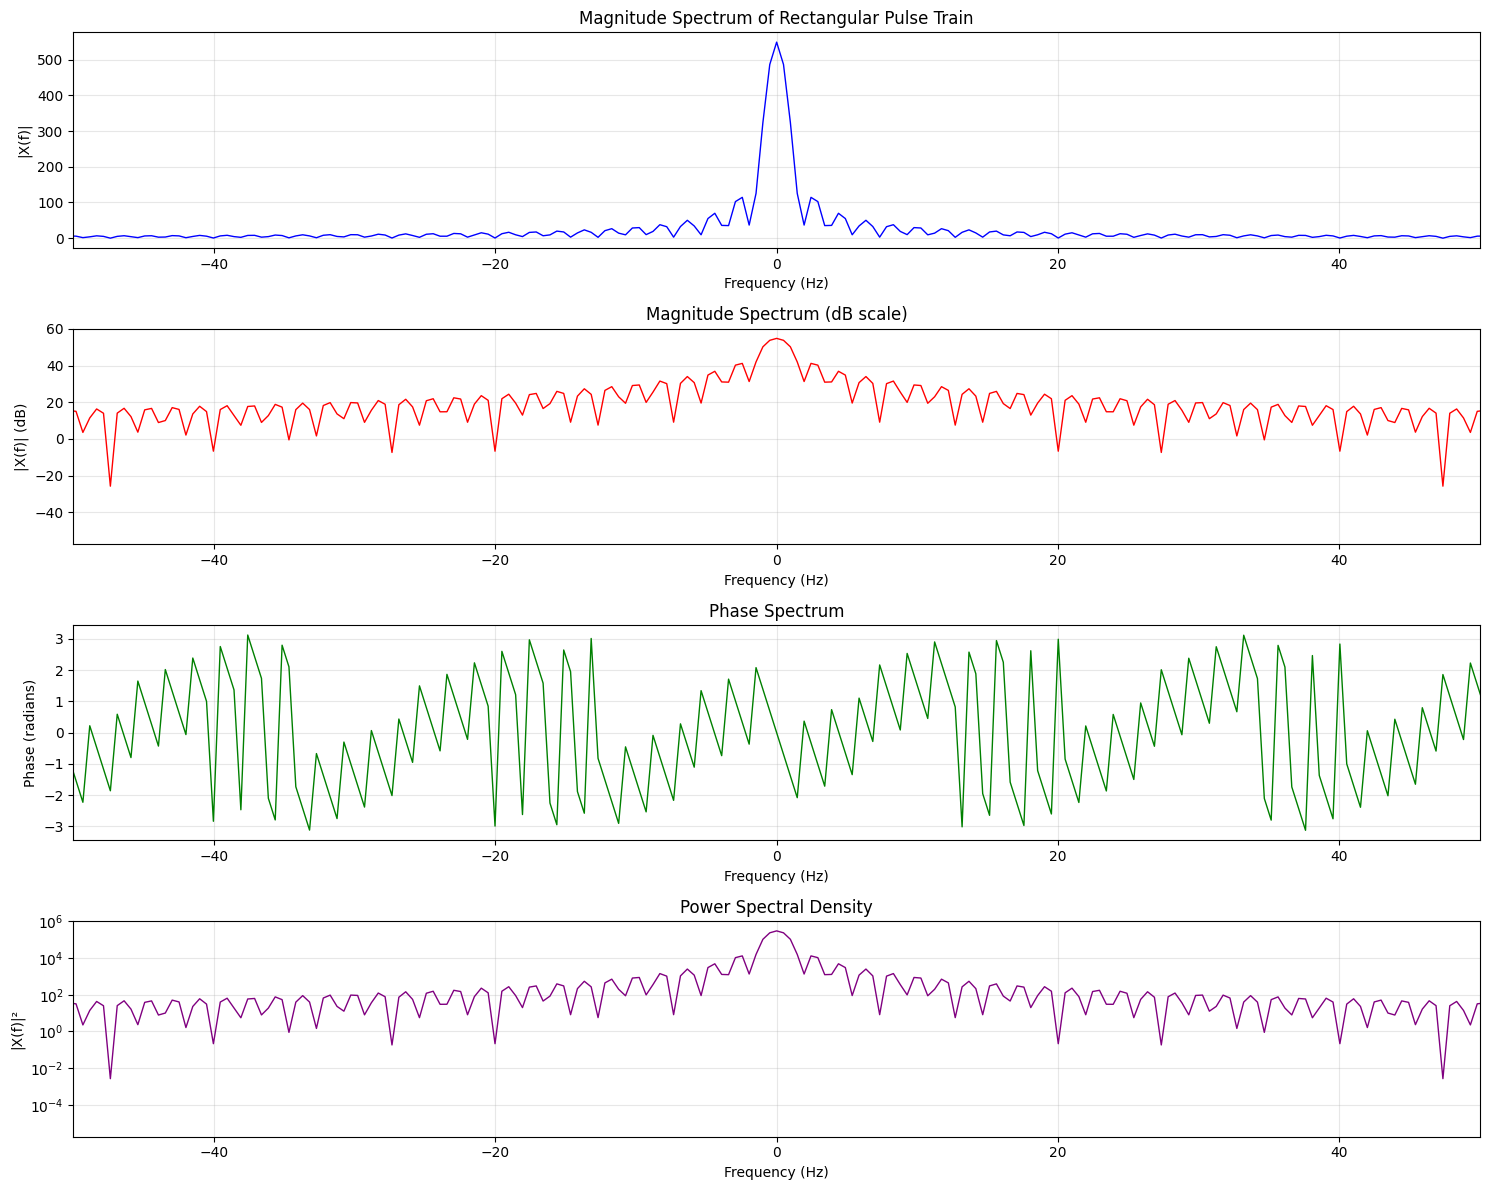


Frequency Domain Analysis:
Fundamental frequency: 0.50 Hz
First null occurs at: 2.00 Hz
Harmonic spacing: 0.50 Hz


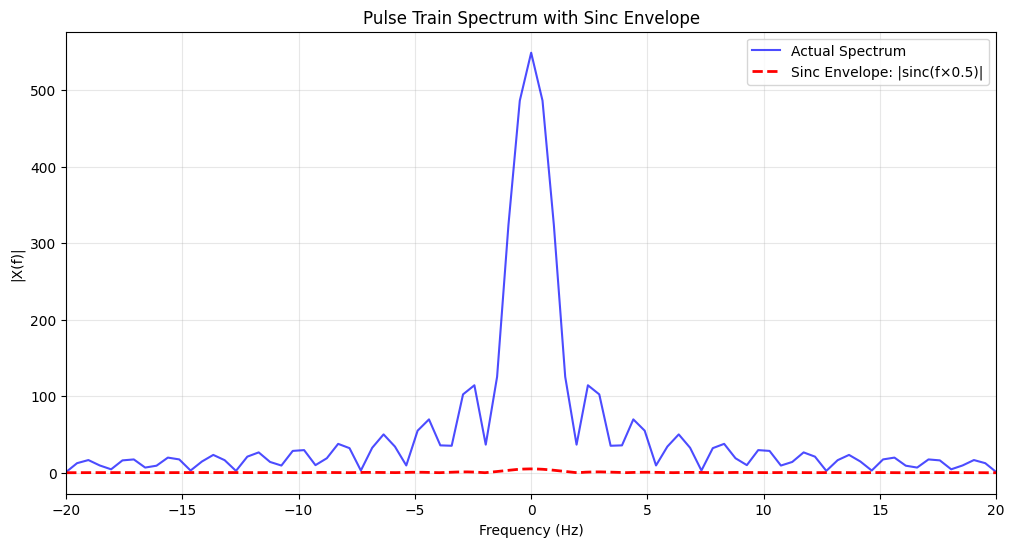

In [14]:
# Frequency domain analysis of the pulse train
nfft = 2048
pulse_fft = np.fft.fft(pulse_train, nfft)
pulse_fft_shifted = np.fft.fftshift(pulse_fft)
frequencies = np.fft.fftshift(np.fft.fftfreq(nfft, 1/fs))

# Calculate magnitude and phase
magnitude_spectrum = np.abs(pulse_fft_shifted)
phase_spectrum = np.angle(pulse_fft_shifted)
power_spectrum = magnitude_spectrum**2

# Plot frequency domain
plt.figure(figsize=(15, 12))

# Magnitude spectrum - full range
plt.subplot(4, 1, 1)
plt.plot(frequencies, magnitude_spectrum, 'b-', linewidth=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.title('Magnitude Spectrum of Rectangular Pulse Train')
plt.grid(True, alpha=0.3)
plt.xlim(-50, 50)  # Focus on low frequencies

# Magnitude spectrum - dB scale
plt.subplot(4, 1, 2)
magnitude_db = 20 * np.log10(magnitude_spectrum + 1e-12)  # Add small value to avoid log(0)
plt.plot(frequencies, magnitude_db, 'r-', linewidth=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)| (dB)')
plt.title('Magnitude Spectrum (dB scale)')
plt.grid(True, alpha=0.3)
plt.xlim(-50, 50)

# Phase spectrum
plt.subplot(4, 1, 3)
plt.plot(frequencies, phase_spectrum, 'g-', linewidth=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase Spectrum')
plt.grid(True, alpha=0.3)
plt.xlim(-50, 50)

# Power spectral density
plt.subplot(4, 1, 4)
plt.semilogy(frequencies, power_spectrum, 'purple', linewidth=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|²')
plt.title('Power Spectral Density')
plt.grid(True, alpha=0.3)
plt.xlim(-50, 50)

plt.tight_layout()
plt.show()

# Theoretical analysis
fundamental_freq = 1/T_period
print(f"\nFrequency Domain Analysis:")
print(f"Fundamental frequency: {fundamental_freq:.2f} Hz")
print(f"First null occurs at: {1/pulse_width:.2f} Hz")
print(f"Harmonic spacing: {fundamental_freq:.2f} Hz")

# The envelope of the spectrum follows sinc(f*τ) pattern
f_envelope = np.linspace(-20, 20, 1000)
sinc_envelope = np.abs(np.sinc(f_envelope * pulse_width)) * amplitude * pulse_width * total_duration

plt.figure(figsize=(12, 6))
plt.plot(frequencies, magnitude_spectrum, 'b-', alpha=0.7, label='Actual Spectrum')
plt.plot(f_envelope, sinc_envelope, 'r--', linewidth=2, label=f'Sinc Envelope: |sinc(f×{pulse_width})|')
plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.title('Pulse Train Spectrum with Sinc Envelope')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-20, 20)
plt.show()

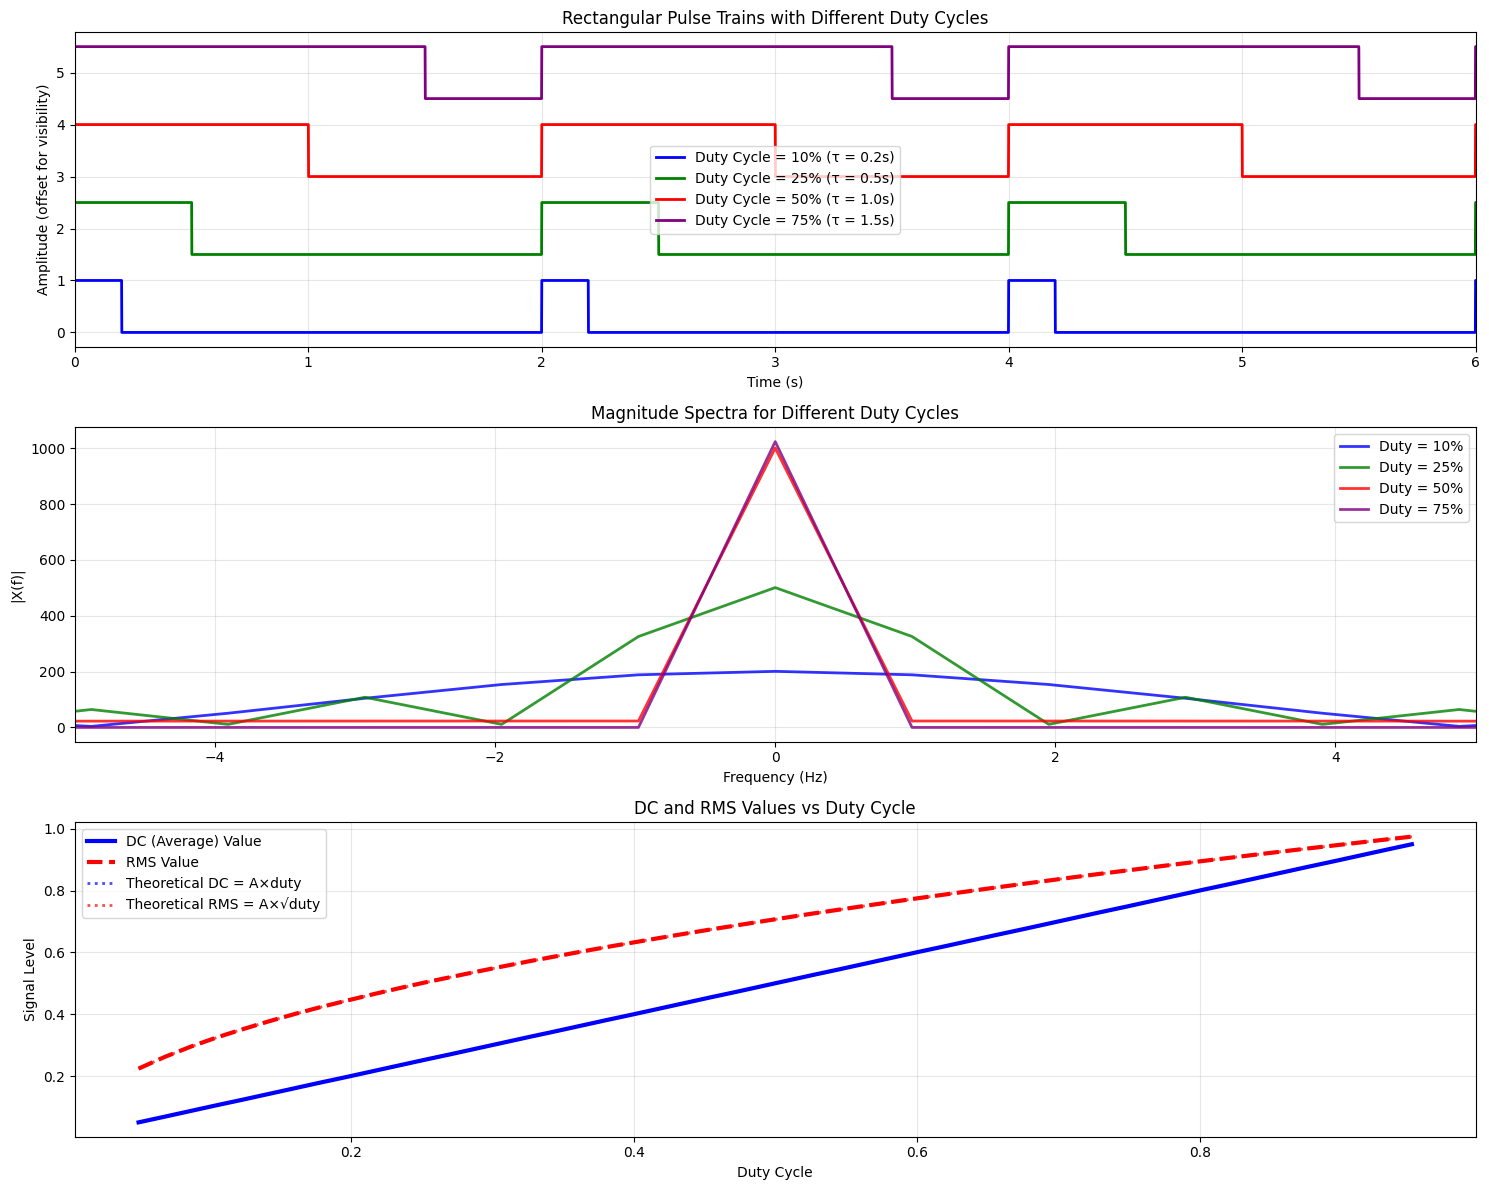

Key Observations:
1. Lower duty cycle → narrower pulses → wider frequency spectrum
2. Higher duty cycle → wider pulses → narrower frequency spectrum
3. DC value = Amplitude × Duty Cycle
4. RMS value = Amplitude × √(Duty Cycle)
5. First spectral null occurs at f = 1/τ (pulse width)


In [15]:
# Explore different duty cycles
duty_cycles = [0.1, 0.25, 0.5, 0.75]  # 10%, 25%, 50%, 75%
colors = ['blue', 'green', 'red', 'purple']
T_fixed = 2.0  # Fixed period
duration_short = 8.0  # Shorter duration for comparison
t_comparison = np.linspace(0, duration_short, int(fs * duration_short), endpoint=False)

plt.figure(figsize=(15, 12))

# Time domain comparison
plt.subplot(3, 1, 1)
for i, duty in enumerate(duty_cycles):
    pulse_w = duty * T_fixed
    pulse_train_duty = rectangular_pulse_train(t_comparison, T_fixed, pulse_w, amplitude)
    plt.plot(t_comparison, pulse_train_duty + i*1.5, colors[i], linewidth=2, 
             label=f'Duty Cycle = {duty:.0%} (τ = {pulse_w:.1f}s)')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (offset for visibility)')
plt.title('Rectangular Pulse Trains with Different Duty Cycles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 6)

# Frequency domain comparison
plt.subplot(3, 1, 2)
for i, duty in enumerate(duty_cycles):
    pulse_w = duty * T_fixed
    pulse_train_duty = rectangular_pulse_train(t_comparison, T_fixed, pulse_w, amplitude)
    
    # FFT analysis
    fft_duty = np.fft.fft(pulse_train_duty, 1024)
    fft_duty_shifted = np.fft.fftshift(fft_duty)
    freqs_duty = np.fft.fftshift(np.fft.fftfreq(1024, 1/fs))
    
    plt.plot(freqs_duty, np.abs(fft_duty_shifted), colors[i], linewidth=2, 
             label=f'Duty = {duty:.0%}', alpha=0.8)

plt.xlabel('Frequency (Hz)')
plt.ylabel('|X(f)|')
plt.title('Magnitude Spectra for Different Duty Cycles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-5, 5)

# Average (DC) value vs duty cycle
plt.subplot(3, 1, 3)
duty_range = np.linspace(0.05, 0.95, 50)
dc_values = []
rms_values = []

for duty in duty_range:
    pulse_w = duty * T_fixed
    pulse_train_temp = rectangular_pulse_train(t_comparison, T_fixed, pulse_w, amplitude)
    dc_values.append(np.mean(pulse_train_temp))
    rms_values.append(np.sqrt(np.mean(pulse_train_temp**2)))

plt.plot(duty_range, dc_values, 'b-', linewidth=3, label='DC (Average) Value')
plt.plot(duty_range, rms_values, 'r--', linewidth=3, label='RMS Value')
plt.xlabel('Duty Cycle')
plt.ylabel('Signal Level')
plt.title('DC and RMS Values vs Duty Cycle')
plt.legend()
plt.grid(True, alpha=0.3)

# Add theoretical lines
plt.plot(duty_range, duty_range * amplitude, 'b:', linewidth=2, alpha=0.7, label='Theoretical DC = A×duty')
plt.plot(duty_range, amplitude * np.sqrt(duty_range), 'r:', linewidth=2, alpha=0.7, label='Theoretical RMS = A×√duty')
plt.legend()

plt.tight_layout()
plt.show()

print("Key Observations:")
print("1. Lower duty cycle → narrower pulses → wider frequency spectrum")
print("2. Higher duty cycle → wider pulses → narrower frequency spectrum") 
print("3. DC value = Amplitude × Duty Cycle")
print("4. RMS value = Amplitude × √(Duty Cycle)")
print("5. First spectral null occurs at f = 1/τ (pulse width)")